# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


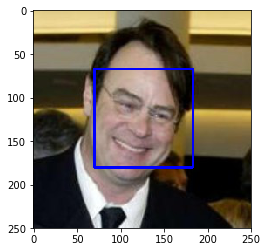

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_counter = 0
dog_counter = 0
total = 100

for i in range(total):
    human_counter += face_detector(human_files_short[i])
    dog_counter += face_detector(dog_files_short[i])
    
print("{:.2f}% is human".format(human_counter/total*100))
print("{:.2f}% is dog".format(dog_counter/total*100))

98.00% is human
17.00% is dog


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:06<00:00, 91195088.78it/s]


In [6]:
# define ResNet50 model
ResNet50 = models.resnet50(pretrained=True)
ResNet50 = ResNet50.eval()


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 79711444.44it/s]


In [7]:
# define InceptionV3 model
InceptionV3 = models.inception_v3(pretrained=True)
InceptionV3 = InceptionV3.eval()


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 64558809.84it/s]


In [8]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    ResNet50 = ResNet50.cuda()
    InceptionV3 = InceptionV3.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [9]:
from PIL import Image
import torchvision.transforms as transforms
def get_tensor(img_path, min_img_size):
    '''
    The input image is normalized with the mean of [0.485, 0.456, 0.406] 
    and std of [0.229, 0.224, 0.225]. 
    '''
    img = Image.open(img_path).convert('RGB')
    transformations = transforms.Compose([transforms.Resize(size=min_img_size),
                                          transforms.CenterCrop((min_img_size,min_img_size)),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])
    img_tensor = transformations(img)[:3,:,:].unsqueeze(0)
    
    if torch.cuda.is_available():
        img_tensor = img_tensor.cuda()
        
    return img_tensor

In [10]:
#Use pre-trained network VGG16
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    image_tensor = get_tensor(img_path, 224)

    prediction = VGG16(image_tensor)
    
    if torch.cuda.is_available():
        prediction = prediction.cpu()

    index = prediction.data.numpy().argmax()
        
    return index

In [11]:
#Use pre-trained network ResNet50
def ResNet50_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    image_tensor = get_tensor(img_path, 224)

    prediction = ResNet50(image_tensor)
    
    # move tensor to cpu, for cpu processing
    if torch.cuda.is_available():
        prediction = prediction.cpu()

    index = prediction.data.numpy().argmax()
        
    return index

In [12]:
#Use pre-trained network InceptionV3
def InceptionV3_predict(img_path):
    '''
    Use pre-trained Inception V3 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    Args:
        img_path: path to an image  
    Returns:
        Index corresponding to InceptionV3 model's prediction
    '''
    image_tensor = get_tensor(img_path, 299)
    # predict
    prediction = InceptionV3(image_tensor)
    # get the max index
    
    if torch.cuda.is_available():
        prediction = prediction.cpu()
        
    index = prediction.data.numpy().argmax()
    return index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [13]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path, predictor):
    ## TODO: Complete the function.
    index = predictor(img_path)
    return (151 <= index and index <= 268) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
I've used 3 pre-trained model for the detection
VGG16
   Percentage of images in human_files_short have a detected dog : 1.00%
   
   Percentage of images in dog_files_short have a detected dog : 100.00%
   
ResNet50  
   Percentage of images in human_files_short have a detected dog : 0.00%
   
   Percentage of images in dog_files_short have a detected dog : 100.00%
   
InceptionV3
   Percentage of images in human_files_short have a detected dog : 1.00%
   
   Percentage of images in dog_files_short have a detected dog : 100.00%

In [14]:
#Function to access the performance of different models
def assess_model(predictor):
    human_files_detected_as_human = np.average([dog_detector(img, predictor) for img in human_files_short])
    dog_files_detected_as_human = np.average([dog_detector(img, predictor) for img in dog_files_short])
    
    print('Percentage of images in human_files_short have a detected dog : {:.2f}%'.format(human_files_detected_as_human*100))
    print('Percentage of images in dog_files_short have a detected dog : {:.2f}%'.format(dog_files_detected_as_human*100))

In [15]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
# VGG16 
assess_model(VGG16_predict)

Percentage of images in human_files_short have a detected dog : 1.00%
Percentage of images in dog_files_short have a detected dog : 100.00%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [16]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
# ResNet50
assess_model(ResNet50_predict)

Percentage of images in human_files_short have a detected dog : 0.00%
Percentage of images in dog_files_short have a detected dog : 100.00%


In [17]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
# InceptionV3
assess_model(InceptionV3_predict)

Percentage of images in human_files_short have a detected dog : 1.00%
Percentage of images in dog_files_short have a detected dog : 100.00%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [18]:
# Dataset with Argmentation
import os
from torchvision import datasets
from torch.utils.data import DataLoader, ConcatDataset

data_dir = '/data/dog_images/'
 
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x))
                  for x in ['train', 'valid', 'test']}

batch_size = 16
num_workers = 0

# normalize the data
transform = transforms.Compose([transforms.Resize(size=224),
                                transforms.CenterCrop((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Augmentation of training data
aug_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.CenterCrop((224,224)),
    transforms.RandomGrayscale(p=0.1),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])    
])

train_ori_data = datasets.ImageFolder('/data/dog_images/train', transform=transform)
train_aug_data = datasets.ImageFolder('/data/dog_images/train', transform=aug_transform)
valid_data = datasets.ImageFolder('/data/dog_images/valid', transform=transform)
test_data = datasets.ImageFolder('/data/dog_images/test', transform=transform)

train_data = ConcatDataset([train_ori_data, train_aug_data])

loaders_scratch = {};
loaders_scratch['train'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
loaders_scratch['valid'] = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
loaders_scratch['test'] = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
The resize of the images is done by center cropping with a size of 224 since the pretrained models require the size of the imagesto be 224.

Since the size of data samples is not big, by manipulating the original data to create new data samples, I hope overfitting can be avoided, divertsity in data can be increased,and the performance of the model will get improved.
I transformed the original dataset by resizing, center cropping, random horizontal flip, random rotation and RandomGrayScale(p=0.1).

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader, ConcatDataset
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision import datasets
# Set PIL to be tolerant of image files that are truncated.
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

%matplotlib inline

# define the CNN architecture
# It is a VGG16 like architecture
class Base(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Base, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)   # 3x224x224 --> 16x224x224
        self.pool1 = nn.MaxPool2d(2, 2)               # 16x224x224 --> 16x112x112
        
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # 16x112x112 --> 32x112x112
        self.pool2 = nn.MaxPool2d(2, 2)               # 32x112x112 --> 32x56x56
        
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)  # 32x56x56 --> 64x56x56
        self.pool3 = nn.MaxPool2d(2, 2)               # 64x56x56 --> 64x28x28
        
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1) # 64x28x28 --> 128x28x28
        self.pool4 = nn.MaxPool2d(2, 2)               # 128x28x28 --> 128x14x14
        
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)# 128x14x14 --> 256x14x14
        self.pool5 = nn.MaxPool2d(2, 2)               # 256x14x14 --> 256x7x7
        
        self.fc1 = nn.Linear(256 * 7 * 7, 500)        # 256 * 7 * 7 --> 500
        
        self.fc2 = nn.Linear(500, 133)                # 500 --> 133
        self.dropout = nn.Dropout(0.25)    
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = self.pool5(F.relu(self.conv5(x)))
        x = self.dropout(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)    
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Base()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [20]:
import torch.nn as nn
import torch.nn.functional as F
# define the CNN architecture
# Add Batch Normalization layers
class Base_BN(nn.Module):
    def __init__(self):
        super(Base_BN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)    # 3x224x224 --> 16x224x224
        self.bn1   = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(2, 2)                            # 16x224x224 --> 16x112x112
        
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)   # 16x112x112 --> 32x112x112
        self.bn2   = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2, 2)                            # 32x112x112 --> 32x56x56
        
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)   # 32x56x56 --> 64x56x56
        self.bn3   = nn.BatchNorm2d(64)
        self.pool3 = nn.MaxPool2d(2, 2)                            # 64x56x56 --> 64x28x28
        
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)  # 64x28x28 --> 128x28x28
        self.bn4   = nn.BatchNorm2d(128)
        self.pool4 = nn.MaxPool2d(2, 2)                            # 128x28x28 --> 128x14x14
        
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1) # 128x14x14 --> 256x14x14
        self.bn5   = nn.BatchNorm2d(256)
        self.pool5 = nn.MaxPool2d(2, 2)                            # 256x14x14 --> 256x7x7
        
        self.fc1 = nn.Linear(256 * 7 * 7, 500)                     # 256 * 7 * 7 --> 500)
        self.bn6   = nn.BatchNorm1d(500)
        self.fc2 = nn.Linear(500, 133)                             # 500 --> 133)
        
    def forward(self, x):
        x = self.bn1(self.pool1(F.relu(self.conv1(x))))
        x = self.bn2(self.pool2(F.relu(self.conv2(x))))
        x = self.bn3(self.pool3(F.relu(self.conv3(x))))
        x = self.bn4(self.pool4(F.relu(self.conv4(x))))
        x = self.bn5(self.pool5(F.relu(self.conv5(x))))
        x = x.view(-1, 256 * 7 * 7)
        x = self.bn6(F.relu(self.fc1(x)))
        x = self.fc2(x)        
        return x
    
# instantiate the CNN
model_scratch = Base_BN()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [21]:
import torch.nn as nn
import torch.nn.functional as F
# define the CNN architecture
# Add Global Average Pool layer
class Base_GAP(nn.Module):
    def __init__(self):
        super(Base_GAP, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)    # 3x224x224 --> 16x224x224
        self.pool1 = nn.MaxPool2d(2, 2)                            # 16x224x224 --> 16x112x112
        
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)   # 16x112x112 --> 32x112x112
        self.pool2 = nn.MaxPool2d(2, 2)                            # 32x112x112 --> 32x56x56
        
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)   # 32x56x56 --> 64x56x56
        self.pool3 = nn.MaxPool2d(2, 2)                            # 64x56x56 --> 64x28x28
        
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)  # 64x28x28 --> 128x28x28
        self.pool4 = nn.MaxPool2d(2, 2)                            # 128x28x28 --> 128x14x14
        
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1) # 128x14x14 --> 256x14x14
        self.pool5 = nn.MaxPool2d(2, 2)                            # 256x14x14 --> 256x7x7
        
        self.gap = nn.AdaptiveAvgPool2d(1)                         # 256x7x7 --> 256x1x1
        self.fc1 = nn.Linear(256, 133)                             # 256 --> 133)
  
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = self.pool5(F.relu(self.conv5(x)))
        x = self.gap(x)
        x = x.view(-1, 256 * 1 * 1)
        x = self.fc1(x)        
        return x
    
# instantiate the CNN
model_scratch = Base_GAP()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
I've tried 3 architecture which are all based on a simple VGG architecture as follows:

Base
1. It has alternated conv, pool layers (conv1 - conv5, pool1 - pool5)
2. fully connected layers(fc1, fc2) are added at the end
3. A dropout layer is also added at the very end.
4. I trained it with 20 epochs at a learning rate of 0.001
5. test the performance of the model

I tried to adopt the VGG architecture and start with a simple structure of it.

Base_BN (use the technique of Batch Normalization)
1. Add a Batch Normalization layer between the conv and pool layer (bn1 - bn5)
2. add another Batch Normalization layer(bn6) between the fully connected layers(fc1 and fc2) as well
3. drop the dropout layer
4. I trained it with 20 epochs at a learning rate of 0.001
5. test the performance of the model

Batch normalization is used because it standardizes the inputs to a layer for each mini-batch. 
This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

Base_GAP(use the technique of adding Global Average Pool Layer)
1. Add a Global Average pool layer before the fully connected layer and keep only one fc layer
2. remove the dropout layer
3. I trained it with 20 epochs at a learning rate of 0.001
4. test the performance of the model

Global Average Pool Layer calculates the average output for each feature map from previous layer, that reduces the data significantly and prepares the model for the final classification layer,
thus speeding up the training of the model.


From the test accuracy of the 3 models, the architecture with the Batch normalization(Base_BN) got the best results(37%).
Base got 15%, the architecture with Global Average Pool(Base_GAP) got 28%.

So, the final architecture that won is the architecture with Batch Normalization. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [22]:
import torch.optim as optim

if use_cuda:
    model_scratch.cuda()

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [23]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    train_loss_hist = []
    valid_loss_hist = []
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        train_correct = 0.
        train_total = 0.
        
        valid_loss = 0.0
        valid_correct = 0.
        valid_total = 0.        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (train_data, train_target) in enumerate(loaders['train']):
            # move tensors to GPU if CUDA is available
            if use_cuda:
                train_data, train_target = train_data.cuda(), train_target.cuda()
            # clear the gradients of all optimized variables    
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            train_output = model(train_data)
            # calculate the batch loss
            loss = criterion(train_output, train_target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update total training loss
            train_loss += loss.item()*train_data.size(0)            
            # convert output logits to predicted class
            train_pred = train_output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            train_correct += np.sum(np.squeeze(train_pred.eq(train_target.data.view_as(train_pred))).cpu().numpy())
            train_total += train_data.size(0)
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for val_batch_idx, (val_data, val_target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                val_data, val_target = val_data.cuda(), val_target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            val_output = model(val_data)
            # calculate the batch loss
            val_loss = criterion(val_output, val_target)
            # update total validation loss 
            valid_loss += val_loss.item()*val_data.size(0)
            # convert output logits to predicted class
            valid_pred = val_output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            valid_correct += np.sum(np.squeeze(valid_pred.eq(val_target.data.view_as(valid_pred))).cpu().numpy())
            valid_total += val_data.size(0)
            
        # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
        
        train_accuracy = 100. * train_correct / train_total
        valid_accuracy = 100. * valid_correct / valid_total
            
        # print training/validation statistics 
        if epoch % 5 == 0:
            print('Epoch: {} \tTrain Loss: {:.6f} \tValid Loss: {:.6f}'.format(
                epoch, 
                train_loss,
                valid_loss
                ))
        
        ## Save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Valid Loss DROP FROM {:.6f} TO {:.6f}'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            
            valid_loss_min = valid_loss   
            
        train_loss_hist.append(train_loss)
        valid_loss_hist.append(valid_loss)
            
    # return trained model
    return model, train_loss_hist, valid_loss_hist

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [1]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output logits to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [25]:
# Basic network
# instantiate the CNN
model_scratch = Base()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

# train the model
criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

model_scratch, train_loss_hist, valid_loss_hist  = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                                                        criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Valid Loss DROP FROM inf TO 4.533016
Valid Loss DROP FROM 4.533016 TO 4.154672
Valid Loss DROP FROM 4.154672 TO 4.019175
Valid Loss DROP FROM 4.019175 TO 3.885886
Epoch: 5 	Train Loss: 3.830404 	Valid Loss: 3.789109
Valid Loss DROP FROM 3.885886 TO 3.789109
Valid Loss DROP FROM 3.789109 TO 3.685704
Epoch: 10 	Train Loss: 2.953830 	Valid Loss: 3.804651
Epoch: 15 	Train Loss: 2.409823 	Valid Loss: 4.184253
Epoch: 20 	Train Loss: 2.216260 	Valid Loss: 4.261042
Test Loss: 3.644491


Test Accuracy: 15% (130/836)


In [26]:
# With batch normalization

# instantiate the CNN
model_scratch_BN = Base_BN()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch_BN.cuda()

# train the model
criterion_scratch_BN = nn.CrossEntropyLoss()
optimizer_scratch_BN = optim.Adam(model_scratch_BN.parameters(), lr=0.001)
model_scratch_BN, train_loss_hist_BN, valid_loss_hist_BN = train(20, loaders_scratch, model_scratch_BN, optimizer_scratch_BN, 
                                                                 criterion_scratch_BN, use_cuda, 'model_scratch_BN.pt')

# load the model that got the best validation accuracy
model_scratch_BN.load_state_dict(torch.load('model_scratch_BN.pt'))

# call test function    
test(loaders_scratch, model_scratch_BN, criterion_scratch_BN, use_cuda)

Valid Loss DROP FROM inf TO 4.007946
Valid Loss DROP FROM 4.007946 TO 3.629341
Valid Loss DROP FROM 3.629341 TO 3.213826
Valid Loss DROP FROM 3.213826 TO 3.001094
Epoch: 5 	Train Loss: 2.230949 	Valid Loss: 2.986358
Valid Loss DROP FROM 3.001094 TO 2.986358
Valid Loss DROP FROM 2.986358 TO 2.971793
Valid Loss DROP FROM 2.971793 TO 2.937131
Epoch: 10 	Train Loss: 1.579899 	Valid Loss: 3.063390
Valid Loss DROP FROM 2.937131 TO 2.851446
Epoch: 15 	Train Loss: 1.412964 	Valid Loss: 2.881356
Valid Loss DROP FROM 2.851446 TO 2.806758
Valid Loss DROP FROM 2.806758 TO 2.731008
Valid Loss DROP FROM 2.731008 TO 2.682401
Epoch: 20 	Train Loss: 1.319505 	Valid Loss: 2.677568
Valid Loss DROP FROM 2.682401 TO 2.677568
Test Loss: 2.623038


Test Accuracy: 37% (312/836)


In [27]:
# Basic network with GAP (global average pooling) layer

# instantiate the CNN
model_scratch_GAP = Base_GAP()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch_GAP.cuda()

# train the model
criterion_scratch_GAP = nn.CrossEntropyLoss()
optimizer_scratch_GAP = optim.Adam(model_scratch_GAP.parameters(), lr=0.001)
model_scratch, train_loss_hist_GAP, valid_loss_hist_GAP = train(20, loaders_scratch, model_scratch_GAP, optimizer_scratch_GAP, 
                                                              criterion_scratch_GAP, use_cuda, 'model_scratch_GAP.pt')

# load the model that got the best validation accuracy
model_scratch_GAP.load_state_dict(torch.load('model_scratch_GAP.pt'))

# call test function    
test(loaders_scratch, model_scratch_GAP, criterion_scratch_GAP, use_cuda)

Valid Loss DROP FROM inf TO 4.709268
Valid Loss DROP FROM 4.709268 TO 4.606847
Valid Loss DROP FROM 4.606847 TO 4.442611
Valid Loss DROP FROM 4.442611 TO 4.184616
Epoch: 5 	Train Loss: 4.038937 	Valid Loss: 3.851014
Valid Loss DROP FROM 4.184616 TO 3.851014
Valid Loss DROP FROM 3.851014 TO 3.694761
Valid Loss DROP FROM 3.694761 TO 3.452854
Valid Loss DROP FROM 3.452854 TO 3.334085
Valid Loss DROP FROM 3.334085 TO 3.260823
Epoch: 10 	Train Loss: 2.754776 	Valid Loss: 3.248456
Valid Loss DROP FROM 3.260823 TO 3.248456
Valid Loss DROP FROM 3.248456 TO 3.154913
Valid Loss DROP FROM 3.154913 TO 3.055490
Epoch: 15 	Train Loss: 1.961422 	Valid Loss: 3.200749
Epoch: 20 	Train Loss: 1.584768 	Valid Loss: 3.122200
Test Loss: 3.076160


Test Accuracy: 29% (246/836)


In [28]:
def plot_models_loss(train_losses, valid_losses):
    epochs = 0
    # find the greatest epoch
    for loss in train_losses:
        loss_size = train_losses[loss]
        if len(loss_size) > epochs:
            epochs = len(loss_size) 
    
    plt.title("Training Loss vs Number of Training Epochs")
    plt.xlabel("Training Epochs")
    plt.ylabel("Loss")

    for loss in train_losses:
        plt.plot(range(1, len(train_losses[loss])+1), train_losses[loss], label=loss)
    
    plt.xticks(np.arange(1, epochs+1, 1.0))
    plt.legend()
    
    fig_size = plt.gcf().get_size_inches() # Get current size
    sizefactor = 2 # Set a zoom factor
    # Modify the current size by the factor
    plt.gcf().set_size_inches(sizefactor * fig_size)
    
    plt.show()

    plt.title("Validation Loss vs Number of Training Epochs")
    plt.xlabel("Validation Epochs")
    plt.ylabel("Loss")
    
    for loss in valid_losses:
        plt.plot(range(1, len(valid_losses[loss])+1), valid_losses[loss], label=loss)

    plt.xticks(np.arange(1, epochs+1, 1.0))
    plt.legend()
    
    fig_size = plt.gcf().get_size_inches() # Get current size
    sizefactor = 2 # Set a zoom factor
    # Modify the current size by the factor
    plt.gcf().set_size_inches(sizefactor * fig_size)
    
    plt.show()

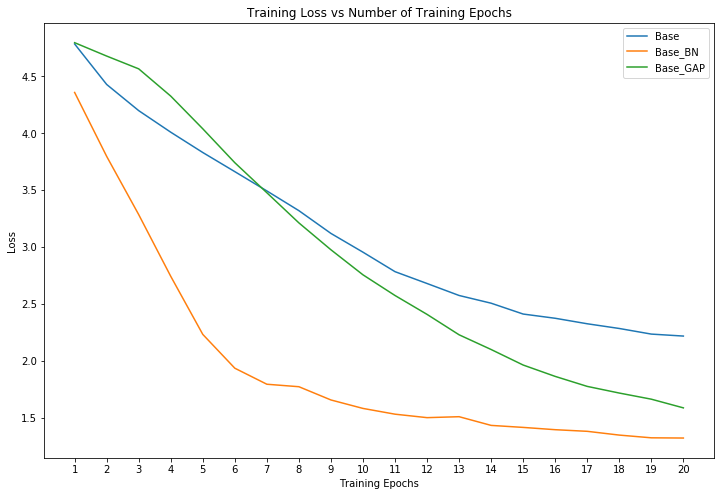

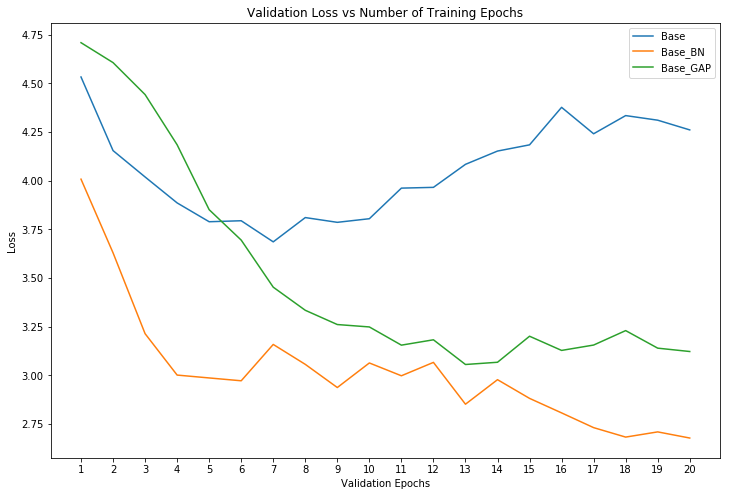

In [29]:
train_loss_list = {"Base": train_loss_hist, "Base_BN": train_loss_hist_BN, "Base_GAP": train_loss_hist_GAP}
valid_loss_list = {"Base": valid_loss_hist, "Base_BN": valid_loss_hist_BN, "Base_GAP": valid_loss_hist_GAP}
plot_models_loss(train_loss_list, valid_loss_list)

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [16]:
## TODO: Specify data loaders
# Use Augmentation dataset
loaders_transfer = loaders_scratch
print(loaders_transfer)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f82893ae710>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f82893aebe0>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7f82893aec50>}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [17]:
# ResNet50
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.fc = nn.Linear(2048, 133, bias=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
Transfer Learning is a method where a model built for a task is reused as a starting point for a model on another task. 
1. Here I use the model ResNet50 as a starting point to solve my problem. 
2. I will keep the common inner layers and customize the final layer(the classifier part).
3. The classifier part is a single fully connected layer. I replace the classifier with 133 classes that accomodated to my current problem.
   model_transfer.fc = nn.Linear(2048, 133, bias=True)
   
I think the atrchitecture is suitable for the current problem since it achieved an accuracy of 83%

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [18]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [19]:
# train the model (with 10 epochs)
model_transfer, train_loss, valid_loss =  train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Valid Loss DROP FROM inf TO 0.620619 	Train Acc: 57.37 	Valid Acc: 78.92
Valid Loss DROP FROM 0.620619 TO 0.538283 	Train Acc: 72.02 	Valid Acc: 83.35
Valid Loss DROP FROM 0.538283 TO 0.464263 	Train Acc: 74.75 	Valid Acc: 85.27
Epoch: 5 	Train Loss: 0.822213 	Valid Loss: 0.538133 	Train Acc: 77.70 	Valid Acc: 85.63
Epoch: 10 	Train Loss: 0.759608 	Valid Loss: 0.579315 	Train Acc: 81.17 	Valid Acc: 83.35


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [20]:
# train the model (with 10 epochs)
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.535418


Test Accuracy: 84% (708/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [35]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]


class_names = [item[4:].replace("_", " ") for item in  image_datasets['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image_tensor = get_tensor(img_path, 224)

    # move model inputs to cuda, if GPU available
    if use_cuda:
        image_tensor = image_tensor.cuda()

    # get sample outputs
    output = model_transfer(image_tensor)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    return class_names[pred]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [36]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if face_detector(img_path) > 0:
        breed = predict_breed_transfer(img_path)
        print('Human is detected : resembing dog breed is ' + breed)
    elif dog_detector(img_path, InceptionV3_predict):
        breed = predict_breed_transfer(img_path)   
        print('Dog is detected: dog breed is ' + breed)
    else:
        print('Neither Dog Nor Human')
        
    plt.figure()
    plt.imshow(Image.open(img_path))
    plt.show()  
    

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
The output is better than I expected, with an accuracy of 83%.
I find it really impressive compared to the 15% accuracy achieved by the model "Base" that was trained from scratch.
The accuracy, when tested on the test set, is 83%. One of the reason the accuracy is so much higher is that ResNet50 was trained on ImageNet, which had a training dataset was not only huge, but also contains more images for each category of dog.

Three  possible points of improvement:
1. increase the number of epoch.
2. try different models for transfer learning.
3. change different optimizers and loss functions for the prediction

Human is detected : resembing dog breed is Poodle


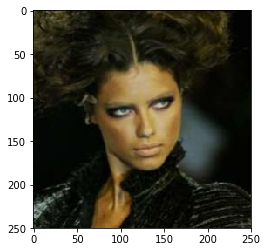

Human is detected : resembing dog breed is Lowchen


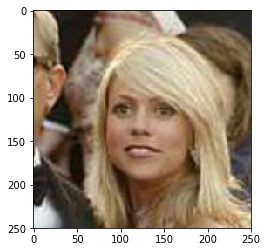

Human is detected : resembing dog breed is Akita


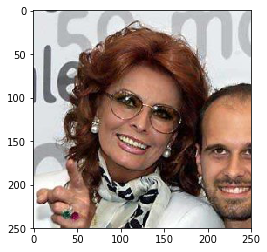

Dog is detected: dog breed is Mastiff


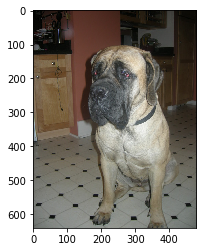

Dog is detected: dog breed is Curly-coated retriever


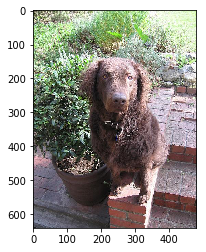

Dog is detected: dog breed is Bichon frise


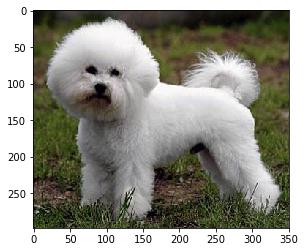

In [37]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
#for file in np.hstack((human_files[:3], dog_files[:3], nature_files[:3])):
n = [20, 150, 260]
for file in np.hstack((human_files[n], dog_files[n])):
    run_app(file)

In [38]:
#import neither nor dog image (nature images)
import os
images_folders = ['data/nature'] 

nature_files = []

for folder in images_folders:
    if not os.path.exists(folder):
        os.makedirs(folder)
    
# download 10 images from each category
for i in range(50):
    nature_files.append("./data/nature/nature-{}.jpg".format(i))
    os.system("wget http://placeimg.com/800/600/nature -O {}".format(nature_files[i]))

Neither Dog Nor Human


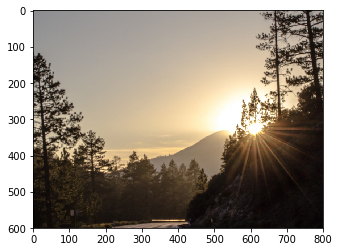

Neither Dog Nor Human


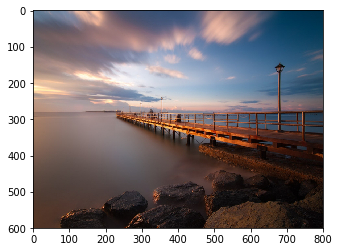

Neither Dog Nor Human


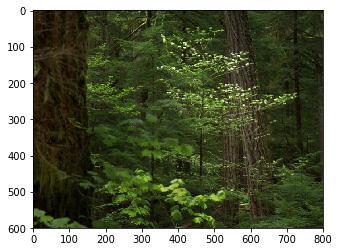

In [39]:
for file in np.hstack((nature_files[:3])):
    run_app(file)

In [4]:
#Benchmark - DataLoaders: using Un-augmentated dataset, For ResNet50 and VGG16 (with input image size of 224)
import os
from torchvision import datasets
from torch.utils.data import DataLoader, ConcatDataset

data_dir = '/data/dog_images/'
 
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x))
                  for x in ['train', 'valid', 'test']}

batch_size = 16
num_workers = 0

# normalize the data
transform = transforms.Compose([transforms.Resize(size=224),
                                transforms.CenterCrop((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_data = datasets.ImageFolder('/data/dog_images/train', transform=transform)
valid_data = datasets.ImageFolder('/data/dog_images/valid', transform=transform)
test_data = datasets.ImageFolder('/data/dog_images/test', transform=transform)

loaders_scratch = {};
loaders_scratch['train'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
loaders_scratch['valid'] = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
loaders_scratch['test'] = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

In [2]:
# Benchmark - DataLoaders: using Un-augmentated dataset, For Inception V3 (with input image size of 299)
import os
from torchvision import datasets
from torch.utils.data import DataLoader, ConcatDataset

data_dir = '/data/dog_images/'
 
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x))
                  for x in ['train', 'valid', 'test']}

batch_size = 16
num_workers = 0

# normalize the data
transform = transforms.Compose([transforms.Resize(size=299),
                                transforms.CenterCrop((299,299)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_data = datasets.ImageFolder('/data/dog_images/train', transform=transform)
valid_data = datasets.ImageFolder('/data/dog_images/valid', transform=transform)
test_data = datasets.ImageFolder('/data/dog_images/test', transform=transform)

loaders_scratch = {};
loaders_scratch['train'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
loaders_scratch['valid'] = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
loaders_scratch['test'] = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

In [5]:
## TODO: Specify data loaders - using Un-augmentated dataset
loaders_transfer = loaders_scratch
print(loaders_transfer)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f7e083f6e48>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f7e121b24e0>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7f7daa5b2dd8>}


In [6]:
# Benchmark - define ResNet50 model 
ResNet50 = models.resnet50(pretrained=True)
ResNet50 = ResNet50.eval()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 94887118.22it/s]


In [7]:
# Benchmark - define VGG16 model
VGG16 = models.vgg16(pretrained=True)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 107516524.67it/s]


In [8]:
# Benchmark - define InceptionV3 model
InceptionV3 = models.inception_v3(pretrained=True)
InceptionV3 = InceptionV3.eval()

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:04<00:00, 24248200.77it/s]


In [9]:
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    ResNet50 = ResNet50.cuda()
    VGG16 = VGG16.cuda()
    InceptionV3 = InceptionV3.cuda()

In [8]:
# Benchmark(Specify Model) - ResNet50
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.fc = nn.Linear(2048, 133, bias=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

In [9]:
# Benchmark(Specify Loss function and Optimizer) - ResNet50
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)

In [10]:
# Benchmark(Specify Model) - VGG16
model_transfer = models.vgg16(pretrained=True)

# VGG 16 - Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

n_inputs = model_transfer.classifier[6].in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, 133)

model_transfer.classifier[6] = last_layer

# if GPU is available, move the model to GPU
if use_cuda:
    model_transfer = model_transfer.cuda()
    
# print out the model structure
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [8]:
# Benchmark(Specify Model) -  Inception V3
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

## TODO: Specify model architecture 
model_transfer = models.inception_v3(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False
num_ftrs = model_transfer.AuxLogits.fc.in_features
model_transfer.AuxLogits.fc = nn.Linear(num_ftrs, 133)

num_ftrs = model_transfer.fc.in_features
model_transfer.fc = nn.Linear(num_ftrs, 133, bias=True)

if use_cuda:
    model_transfer = model_transfer.cuda()
    
print(model_transfer)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [9]:
#  Benchmark(Specify Loss function and Optimizer) - Inception V3
from torch.optim import lr_scheduler

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_transfer = model_transfer.to(device)

# Observe that only parameters of final layer are being optimized as
# opposed to before.
params_to_update = []
for name,param in model_transfer.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

optimizer_transfer = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

criterion = nn.CrossEntropyLoss()
# Decay LR by a factor of 0.1 every epoch
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_transfer, step_size=1, gamma=0.1)

In [14]:
# Benchmark - Define training for Inception V3
import torch
import torch.nn as nn

import time
import copy
def train_model_InceptionV3(model, criterion, optimizer, scheduler, num_epochs=2, is_inception=False):
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch + 1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in loaders_transfer[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train 
                    # mode we calculate the loss by summing the final output and the auxiliary output
                    # but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                    
                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data) 
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [11]:
# Define training job for ResNet50 and VGG16
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    train_loss_hist = []
    valid_loss_hist = []
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        train_correct = 0.
        train_total = 0.
        
        valid_loss = 0.0
        valid_correct = 0.
        valid_total = 0.        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (train_data, train_target) in enumerate(loaders['train']):
            # move tensors to GPU if CUDA is available
            if use_cuda:
                train_data, train_target = train_data.cuda(), train_target.cuda()
            # clear the gradients of all optimized variables    
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            train_output = model(train_data)
            # calculate the batch loss
            loss = criterion(train_output, train_target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update total training loss
            train_loss += loss.item()*train_data.size(0)            
            # convert output logits to predicted class
            train_pred = train_output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            train_correct += np.sum(np.squeeze(train_pred.eq(train_target.data.view_as(train_pred))).cpu().numpy())
            train_total += train_data.size(0)
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for val_batch_idx, (val_data, val_target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                val_data, val_target = val_data.cuda(), val_target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            val_output = model(val_data)
            # calculate the batch loss
            val_loss = criterion(val_output, val_target)
            # update total validation loss 
            valid_loss += val_loss.item()*val_data.size(0)
            # convert output logits to predicted class
            valid_pred = val_output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            valid_correct += np.sum(np.squeeze(valid_pred.eq(val_target.data.view_as(valid_pred))).cpu().numpy())
            valid_total += val_data.size(0)
            
        # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
        
        train_acc = 100. * train_correct / train_total
        valid_acc = 100. * valid_correct / valid_total
            
        # print training/validation statistics 
        if epoch % 5 == 0:
            print('Epoch: {} \tTrain Loss: {:.6f} \tValid Loss: {:.6f} \tTrain Acc: {:.2f} \tValid Acc: {:.2f}'.format(
                epoch, 
                train_loss,
                valid_loss,
                train_acc,
                valid_acc
                ))
        
        ## Save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Valid Loss DROP FROM {:.6f} TO {:.6f} \tTrain Acc: {:.2f} \tValid Acc: {:.2f}'.format(
            valid_loss_min,
            valid_loss,
            train_acc,
            valid_acc))
            torch.save(model.state_dict(), save_path)
            
            valid_loss_min = valid_loss   
            
        train_loss_hist.append(train_loss)
        valid_loss_hist.append(valid_loss)
            
    # return trained model
    return model, train_loss_hist, valid_loss_hist



In [17]:
# Benchmarking(train the model) - ResNet50 10 Epochs
model_transfer, train_loss, valid_loss =  train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Valid Loss DROP FROM inf TO 0.642716 	Train Acc: 70.58 	Valid Acc: 80.36
Valid Loss DROP FROM 0.642716 TO 0.541951 	Train Acc: 82.23 	Valid Acc: 83.71
Valid Loss DROP FROM 0.541951 TO 0.494860 	Train Acc: 87.87 	Valid Acc: 84.19
Epoch: 5 	Train Loss: 0.353778 	Valid Loss: 0.613218 	Train Acc: 88.49 	Valid Acc: 82.51
Valid Loss DROP FROM 0.494860 TO 0.491754 	Train Acc: 90.22 	Valid Acc: 85.63
Epoch: 10 	Train Loss: 0.211243 	Valid Loss: 0.588888 	Train Acc: 93.02 	Valid Acc: 83.71


In [18]:
# Benchmarking(test the model) - ResNet50
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.592299


Test Accuracy: 82% (692/836)


In [10]:
# Benchmarking(Specify Loss function and Optimizer)  - ResNet50 Use the parameter lr=0.004
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.004)

In [11]:
#  Benchmarking(train the model)  - ResNet50 Use the parameter lr=0.004
model_transfer, train_loss, valid_loss =  train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Valid Loss DROP FROM inf TO 1.921475 	Train Acc: 50.34 	Valid Acc: 68.38
Valid Loss DROP FROM 1.921475 TO 1.364143 	Train Acc: 76.92 	Valid Acc: 79.40
Valid Loss DROP FROM 1.364143 TO 1.283564 	Train Acc: 79.40 	Valid Acc: 80.84
Epoch: 5 	Train Loss: 1.021807 	Valid Loss: 1.666454 	Train Acc: 82.63 	Valid Acc: 77.01
Epoch: 10 	Train Loss: 0.889087 	Valid Loss: 1.907152 	Train Acc: 86.45 	Valid Acc: 82.16


In [14]:
# Benchmarking(test the model)  - ResNet50 Use the parameter lr=0.004
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.460650


Test Accuracy: 79% (668/836)


In [15]:
# Benchmarking(Specify Loss function and Optimizer)  - ResNet50 Use the parameter lr=0.0005
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.0005)

In [16]:
#  Benchmarking(train the model)  - ResNet50 Use the parameter lr=0.0005
model_transfer, train_loss, valid_loss =  train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Valid Loss DROP FROM inf TO 0.755317 	Train Acc: 92.35 	Valid Acc: 85.39
Valid Loss DROP FROM 0.755317 TO 0.696623 	Train Acc: 93.37 	Valid Acc: 86.83
Valid Loss DROP FROM 0.696623 TO 0.691591 	Train Acc: 94.18 	Valid Acc: 86.95
Epoch: 5 	Train Loss: 0.178303 	Valid Loss: 0.708841 	Train Acc: 94.88 	Valid Acc: 85.87
Valid Loss DROP FROM 0.691591 TO 0.689616 	Train Acc: 95.01 	Valid Acc: 86.35
Valid Loss DROP FROM 0.689616 TO 0.665732 	Train Acc: 95.69 	Valid Acc: 87.66
Epoch: 10 	Train Loss: 0.134517 	Valid Loss: 0.677142 	Train Acc: 95.72 	Valid Acc: 87.19


In [17]:
# Benchmarking(test the model)  - ResNet50 Use the parameter lr=0.0005
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.832451


Test Accuracy: 86% (723/836)


In [11]:
# Benchmarking(Specify Loss function and Optimizer)  - VGG16
import torch.optim as optim
# define loss function
criterion_transfer = nn.CrossEntropyLoss()

# define optimizer
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)


In [14]:
# Benchmarking(train the model)  - VGG16
model_transfer, train_loss, valid_loss =  train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Valid Loss DROP FROM inf TO 1.598321 	Train Acc: 32.59 	Valid Acc: 71.98
Valid Loss DROP FROM 1.598321 TO 0.734371 	Train Acc: 69.60 	Valid Acc: 81.80
Valid Loss DROP FROM 0.734371 TO 0.563827 	Train Acc: 78.02 	Valid Acc: 84.67
Valid Loss DROP FROM 0.563827 TO 0.474556 	Train Acc: 81.62 	Valid Acc: 86.59
Epoch: 5 	Train Loss: 0.529029 	Valid Loss: 0.448438 	Train Acc: 83.91 	Valid Acc: 86.71
Valid Loss DROP FROM 0.474556 TO 0.448438 	Train Acc: 83.91 	Valid Acc: 86.71
Valid Loss DROP FROM 0.448438 TO 0.417665 	Train Acc: 85.79 	Valid Acc: 87.43
Valid Loss DROP FROM 0.417665 TO 0.401293 	Train Acc: 87.50 	Valid Acc: 87.66
Valid Loss DROP FROM 0.401293 TO 0.377388 	Train Acc: 88.62 	Valid Acc: 88.62
Valid Loss DROP FROM 0.377388 TO 0.367379 	Train Acc: 89.91 	Valid Acc: 88.62
Epoch: 10 	Train Loss: 0.308286 	Valid Loss: 0.363738 	Train Acc: 90.30 	Valid Acc: 88.02
Valid Loss DROP FROM 0.367379 TO 0.363738 	Train Acc: 90.30 	Valid Acc: 88.02


In [15]:
# Benchmarking(test the model)  - VGG16
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.401175


Test Accuracy: 88% (738/836)


In [16]:
# Benchmarking(Specify Loss function and Optimizer)  - VGG16 learning rate = 0.0005
import torch.optim as optim
# define loss function
criterion_transfer = nn.CrossEntropyLoss()

# define optimizer
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.0005)

In [17]:
# Benchmarking(train the model)  - VGG16 learning rate = 0.0005
model_transfer, train_loss, valid_loss =  train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Valid Loss DROP FROM inf TO 3.174535 	Train Acc: 15.85 	Valid Acc: 54.37
Valid Loss DROP FROM 3.174535 TO 1.589791 	Train Acc: 52.08 	Valid Acc: 71.38
Valid Loss DROP FROM 1.589791 TO 0.946479 	Train Acc: 67.08 	Valid Acc: 80.12
Valid Loss DROP FROM 0.946479 TO 0.715025 	Train Acc: 73.95 	Valid Acc: 82.51
Epoch: 5 	Train Loss: 0.807177 	Valid Loss: 0.605052 	Train Acc: 78.07 	Valid Acc: 83.83
Valid Loss DROP FROM 0.715025 TO 0.605052 	Train Acc: 78.07 	Valid Acc: 83.83
Valid Loss DROP FROM 0.605052 TO 0.539491 	Train Acc: 80.27 	Valid Acc: 84.91
Valid Loss DROP FROM 0.539491 TO 0.498059 	Train Acc: 82.56 	Valid Acc: 85.15
Valid Loss DROP FROM 0.498059 TO 0.463812 	Train Acc: 83.37 	Valid Acc: 86.11
Valid Loss DROP FROM 0.463812 TO 0.444104 	Train Acc: 84.13 	Valid Acc: 85.87
Epoch: 10 	Train Loss: 0.475151 	Valid Loss: 0.425035 	Train Acc: 85.60 	Valid Acc: 86.47
Valid Loss DROP FROM 0.444104 TO 0.425035 	Train Acc: 85.60 	Valid Acc: 86.47


In [18]:
# Benchmarking(test the model)  - VGG16 learning rate = 0.0005
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.477363


Test Accuracy: 85% (716/836)


In [12]:
# Benchmarking(Specify Loss function and Optimizer)  - VGG16 learning rate = 0.0008
import torch.optim as optim
# define loss function
criterion_transfer = nn.CrossEntropyLoss()

# define optimizer
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.0008)

In [13]:
# Benchmarking(train the model)  - VGG16 learning rate = 0.0008
model_transfer, train_loss, valid_loss =  train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Valid Loss DROP FROM inf TO 2.096613 	Train Acc: 26.42 	Valid Acc: 65.99
Valid Loss DROP FROM 2.096613 TO 0.912736 	Train Acc: 64.66 	Valid Acc: 80.96
Valid Loss DROP FROM 0.912736 TO 0.626087 	Train Acc: 75.31 	Valid Acc: 85.51
Valid Loss DROP FROM 0.626087 TO 0.534267 	Train Acc: 80.16 	Valid Acc: 86.11
Epoch: 5 	Train Loss: 0.590152 	Valid Loss: 0.473295 	Train Acc: 82.22 	Valid Acc: 86.95
Valid Loss DROP FROM 0.534267 TO 0.473295 	Train Acc: 82.22 	Valid Acc: 86.95
Valid Loss DROP FROM 0.473295 TO 0.448669 	Train Acc: 84.42 	Valid Acc: 87.19
Valid Loss DROP FROM 0.448669 TO 0.421310 	Train Acc: 85.87 	Valid Acc: 87.43
Valid Loss DROP FROM 0.421310 TO 0.402560 	Train Acc: 86.92 	Valid Acc: 87.43
Valid Loss DROP FROM 0.402560 TO 0.379410 	Train Acc: 87.87 	Valid Acc: 88.02
Epoch: 10 	Train Loss: 0.359296 	Valid Loss: 0.375319 	Train Acc: 88.94 	Valid Acc: 88.26
Valid Loss DROP FROM 0.379410 TO 0.375319 	Train Acc: 88.94 	Valid Acc: 88.26


In [14]:
# Benchmarking(test the model)  - VGG16 learning rate = 0.0008
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.414887


Test Accuracy: 87% (733/836)


In [12]:
# Benchmarking(Specify Loss function and Optimizer)  - VGG16 learning rate = 0.005
import torch.optim as optim
# define loss function
criterion_transfer = nn.CrossEntropyLoss()

# define optimizer
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.005)

In [13]:
# Benchmarking(train the model)  - VGG16 learning rate = 0.005
model_transfer, train_loss, valid_loss =  train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Valid Loss DROP FROM inf TO 0.651324 	Train Acc: 60.30 	Valid Acc: 80.72
Valid Loss DROP FROM 0.651324 TO 0.503207 	Train Acc: 82.37 	Valid Acc: 85.87
Valid Loss DROP FROM 0.503207 TO 0.438728 	Train Acc: 87.83 	Valid Acc: 84.67
Valid Loss DROP FROM 0.438728 TO 0.399322 	Train Acc: 90.82 	Valid Acc: 87.78
Epoch: 5 	Train Loss: 0.231044 	Valid Loss: 0.384612 	Train Acc: 92.66 	Valid Acc: 88.26
Valid Loss DROP FROM 0.399322 TO 0.384612 	Train Acc: 92.66 	Valid Acc: 88.26
Valid Loss DROP FROM 0.384612 TO 0.371089 	Train Acc: 94.67 	Valid Acc: 88.74
Epoch: 10 	Train Loss: 0.075657 	Valid Loss: 0.375512 	Train Acc: 97.77 	Valid Acc: 87.90


In [14]:
# Benchmarking(test the model)  - VGG16 learning rate = 0.005
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.431444


Test Accuracy: 87% (734/836)


In [12]:
#  Benchmark(Specify Model, define the loss function and Optimizer) - Inception V3
from torch.optim import lr_scheduler

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_transfer = model_transfer.to(device)

# Observe that only parameters of final layer are being optimized as
# opposed to before.
params_to_update = []
for name,param in model_transfer.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

optimizer_transfer = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

criterion = nn.CrossEntropyLoss()
# Decay LR by a factor of 0.1 every epoch
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_transfer, step_size=1, gamma=0.1)

In [15]:
# Benchmark(train the Model) - Inception V3
model_transfer = train_model_InceptionV3(model_transfer, criterion, optimizer_transfer,
                         exp_lr_scheduler, num_epochs=10, is_inception=True)

Epoch 1/10
----------
train Loss: 4.9247 Acc: 0.5117
valid Loss: 3.2816 Acc: 0.6192

Epoch 2/10
----------
train Loss: 4.8061 Acc: 0.5328
valid Loss: 3.2567 Acc: 0.6251

Epoch 3/10
----------
train Loss: 4.8010 Acc: 0.5307
valid Loss: 3.2608 Acc: 0.6204

Epoch 4/10
----------
train Loss: 4.8115 Acc: 0.5317
valid Loss: 3.2759 Acc: 0.6132

Epoch 5/10
----------
train Loss: 4.8050 Acc: 0.5328
valid Loss: 3.2742 Acc: 0.6228

Epoch 6/10
----------
train Loss: 4.8080 Acc: 0.5331
valid Loss: 3.2937 Acc: 0.6180

Epoch 7/10
----------
train Loss: 4.7967 Acc: 0.5391
valid Loss: 3.2714 Acc: 0.6192

Epoch 8/10
----------
train Loss: 4.8097 Acc: 0.5383
valid Loss: 3.2686 Acc: 0.6216

Epoch 9/10
----------
train Loss: 4.8063 Acc: 0.5347
valid Loss: 3.2744 Acc: 0.6084

Epoch 10/10
----------
train Loss: 4.8026 Acc: 0.5337
valid Loss: 3.2742 Acc: 0.6204

Training complete in 31m 23s
Best val Acc: 0.625150


In [17]:
# Benchmark(train the Model) - Use Inception V3
test(loaders_transfer, model_transfer, criterion, use_cuda)

Test Loss: 3.232444


Test Accuracy: 63% (529/836)
